A. Here are 400 random bits: 0000001101100100101000101100100110100000101001100100111101010000011111110100110101101000010111000100110111101101000110001101011011011000011010101100101111100011110010011110011011111010111000110110000100010111010110001111100011100111011101101111001110111110100101100010100100011110100010011110000111110011010101010000100001110101000101110110001001011011011111100111111110110101000000111111111110010100

1) Turn them into 200 random moves in the SmallGridWorld pictured below, in which there are two terminal states in gray and every move has reward -1: up=00, down=11, left=10, right=01.
2) Turn the 200 moves into episodes, each starting in state 5, the last episode possibly not terminating.
3) Starting with all state values equal to -18, apply first-visit Monte Carlo and Temporal Difference TD(0) with alpha = 0.1.
4) Visualize the updated state values after each episode.
5) Plot the root-mean squared error vs. episode number: $$RMS = \sqrt{\frac{1}{14} \sum_s \left( V(s) - v_\pi(s) \right)^2 }$$ where pi is the random policy.

![td.png](td.png)

In [8]:
# turning the action string into 200 action moves

action_string = "0000001101100100101000101100100110100000101001100100111101010000011111110100110101101000010111000100110111101101000110001101011011011000011010101100101111100011110010011110011011111010111000110110000100010111010110001111100011100111011101101111001110111110100101100010100100011110100010011110000111110011010101010000100001110101000101110110001001011011011111100111111110110101000000111111111110010100"

actions = [action_string[i:i+2] for i in range(0, len(action_string), 2)]
print(actions)

['00', '00', '00', '11', '01', '10', '01', '00', '10', '10', '00', '10', '11', '00', '10', '01', '10', '10', '00', '00', '10', '10', '01', '10', '01', '00', '11', '11', '01', '01', '00', '00', '01', '11', '11', '11', '01', '00', '11', '01', '01', '10', '10', '00', '01', '01', '11', '00', '01', '00', '11', '01', '11', '10', '11', '01', '00', '01', '10', '00', '11', '01', '01', '10', '11', '01', '10', '00', '01', '10', '10', '10', '11', '00', '10', '11', '11', '10', '00', '11', '11', '00', '10', '01', '11', '10', '01', '10', '11', '11', '10', '10', '11', '10', '00', '11', '01', '10', '00', '01', '00', '01', '01', '11', '01', '01', '10', '00', '11', '11', '10', '00', '11', '10', '01', '11', '01', '11', '01', '10', '11', '11', '00', '11', '10', '11', '11', '10', '10', '01', '01', '10', '00', '10', '10', '01', '00', '01', '11', '10', '10', '00', '10', '01', '11', '10', '00', '01', '11', '11', '00', '11', '01', '01', '01', '01', '00', '00', '10', '00', '01', '11', '01', '01', '00', '01', '01

In [9]:
import numpy as np
alpha = 0.1
reward = -1
# up=00, down=11, left=10, right=01
actions = ["00", "11", "10", "01"]


## First-Visit Monte Carlo

In [ ]:
import numpy as np
num_states = 16
terminal_states = [0, 15]
state_values = np.full(num_states, -18, dtype=float)
returns = [[] for _ in range(num_states)]
epsilon = 0.1
actions_map = {"00": "up", "11": "down", "10": "left", "01": "right"}

'''
Here i implemented first-visit monte carlo for the gridworld presented.
i set the parameters according to the homework and the environment
created next_state function to tell the computer what state we will end up in after an action
generated episode function to create episodes based on action sequences
lastly, the loop runs the first-visit monte carlo algorithm.
'''

def next_state(state, action):
  # 4x4 grid: states 0 (terminal), 1-14, 15 (terminal)
  if state in [0, 15]:
      return state  # terminal states stay the same
  row, col = divmod(state - 1, 4)  # states 1-14 mapped to grid
  if action == "00":  # up
      if row == 0:
          return state
      else:
          return 1 + (row - 1) * 4 + col
  elif action == "11":  # down
      if row == 3:
          return state
      else:
          return 1 + (row + 1) * 4 + col
  elif action == "10":  # left
      if col == 0:
          return state
      else:
          return state - 1
  elif action == "01":  # right
      if col == 3:
          return state
      else:
          return state + 1
  return state

def generate_episode(actions, start_state=5):
    episode = []
    state = start_state
    for action in actions:
      if state in terminal_states:
        break
      episode.append((state, action, -1))
      state = next_state(state, action)
    return episode

# run many episodes and only update the state value if it hasnt been visited yet
for start_state in range(num_states):
  for ep_num in range(0, len(actions), 20):
      episode = generate_episode(actions[ep_num:ep_num+20], start_state=start_state)
      visited = set()
      G = 0
      for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G += reward
        if state not in visited:
          returns[state].append(G)
          state_values[state] = np.mean(returns[state])
          visited.add(state)
        
visited_states = [i for i, r in enumerate(returns) if len(r) > 0]
print("Visited states:", visited_states)

print(state_values)


Visited states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[-18.          -3.          -3.          -3.          -3.
  -1.4         -1.8         -1.8         -2.33333333  -1.66666667
  -2.          -1.5         -2.          -1.          -2.
 -18.        ]


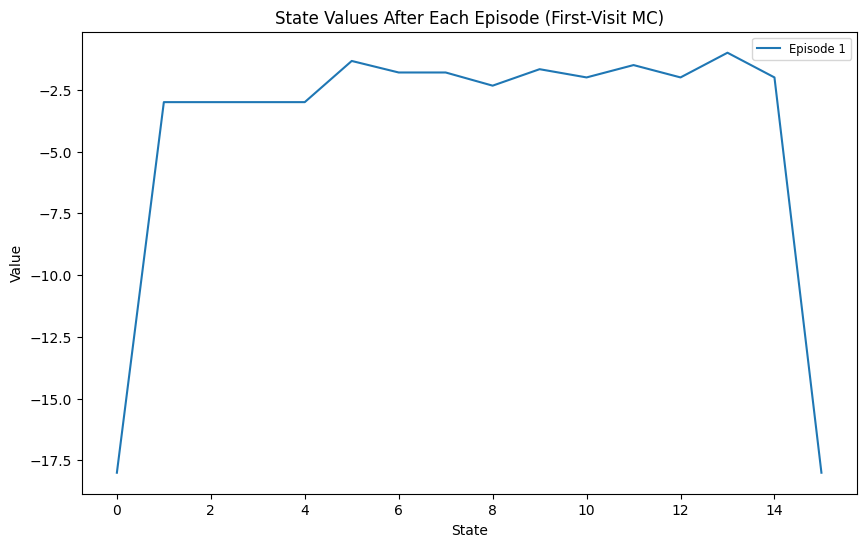

In [ ]:
import matplotlib.pyplot as plt

# Visualize state values after each episode for first-visit monte carlo
state_values_history = []
for ep_num in range(0, len(actions), 20):
    episode = generate_episode(actions[ep_num:ep_num+20])
    visited = set()
    G = 0
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G += reward
        if state not in visited:
            returns[state].append(G)
            state_values[state] = np.mean(returns[state])
            visited.add(state)
    state_values_history.append(state_values.copy())

# Plot state values for each episode
plt.figure(figsize=(10, 6))
for i, values in enumerate(state_values_history):
    plt.plot(values, label=f'Episode {i+1}')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('State Values After Each Episode (First-Visit MC)')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.show()

## Temporal Difference TD(0)

In [ ]:
def td_zero_prediction(env, policy, num_episodes, alpha, gamma):
    return


def policy(state):
    return 

Root Mean Squared Error RMS

In [ ]:
rms_errors = []
for episode_num in range(num_episodes):
    rms=np.sqrt(np.mean((state_values - true_values) ** 2))
    rms_errors.append(rms)

# plot